In [22]:
!pip install kaggle

In [14]:
!mkdir -p ~/.kaggle/


In [18]:
!cp kaggle.json ~/.kaggle/

In [19]:
! chmod 600 ~/.kaggle/kaggle.json


In [24]:
! kaggle datasets download gunavenkatdoddi/eye-diseases-classification


Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
eye-diseases-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
! unzip eye-diseases-classification.zip

Archive:  eye-diseases-classification.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_left.jpg  
  inflating: dataset/cataract/1415_right.jpg  
  inflating: dataset/cataract/1435_left.jpg  
  inflating: dataset/cataract/1444_left.jpg  
  inflating: dataset/cataract/1452_l

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import cv2,PIL,glob,pathlib
import numpy as np

In [27]:
normal = pathlib.Path("dataset/normal")
glaucoma = pathlib.Path("dataset/glaucoma")
retinopathy = pathlib.Path("dataset/diabetic_retinopathy")
cataract = pathlib.Path("dataset/cataract")

In [43]:
images_dict = {"normal": list(normal.glob("*.jpg")),
               "glaucoma":list(glaucoma.glob("*.jpg")),
               "diabetic_retinopathy":list(retinopathy.glob("*.jpg")),
               "cataract":list(cataract.glob("*.jpg"))}
labels_dict= {
    "normal":0, "glaucoma":1, "diabetic_retinopathy":2, "cataract":3
}

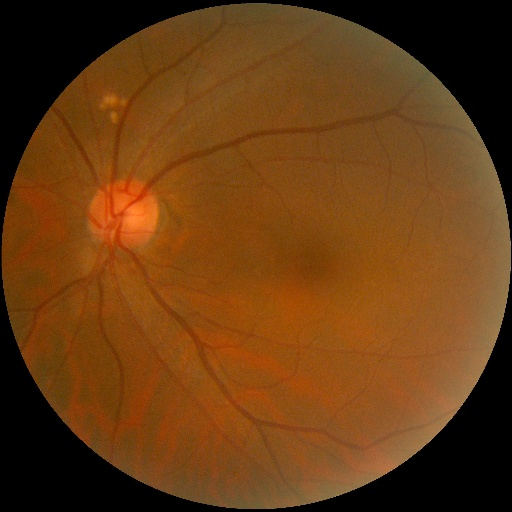

In [44]:
PIL.Image.open(str(images_dict["normal"][200]))

In [84]:
X, y = [], []
for label, images in images_dict.items():
  for image in images :
    image = cv2.imread(str(image))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(180, 180))
    if image is not None:
      X.append(image)
      y.append(labels_dict[label])

In [85]:
X = np.array(X)
y = np.array(y)

In [86]:
X = X/255

In [87]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

In [88]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

In [57]:
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomContrast(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

In [82]:
model = keras.Sequential([
    data_argumentation,
    layers.Conv2D(64, (5, 5), padding="same", input_shape=(180, 180, 3), activation="softmax"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(8, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(50, activation="sigmoid"),
    ])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [89]:
model.fit(X_train, y_train, epochs=150)

Epoch 1/150
73/73 [==============================] - 20s 129ms/step - loss: 1.5147 - accuracy: 0.3183
Epoch 2/150
73/73 [==============================] - 8s 107ms/step - loss: 1.1231 - accuracy: 0.3256
Epoch 3/150
73/73 [==============================] - 8s 108ms/step - loss: 1.1136 - accuracy: 0.3530
Epoch 4/150
73/73 [==============================] - 8s 105ms/step - loss: 1.1111 - accuracy: 0.3500
Epoch 5/150
73/73 [==============================] - 8s 106ms/step - loss: 1.0837 - accuracy: 0.3792
Epoch 6/150
73/73 [==============================] - 8s 104ms/step - loss: 1.0508 - accuracy: 0.4559
Epoch 7/150
73/73 [==============================] - 8s 105ms/step - loss: 1.0422 - accuracy: 0.4447
Epoch 8/150
73/73 [==============================] - 8s 109ms/step - loss: 1.0031 - accuracy: 0.4897
Epoch 9/150
73/73 [==============================] - 8s 105ms/step - loss: 0.9690 - accuracy: 0.5159
Epoch 10/150
73/73 [==============================] - 8s 106ms/step - loss: 0.9607 - accur

KeyboardInterrupt: 